<a href="https://colab.research.google.com/github/andrewrocke/MSc-code/blob/main/GradientBooster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

total dataframe : (8533, 52)
train_ds count : 6761
test_ds count : 1772
train_ds :         start         end  startOffset  endOffset  duration  sPackets  \
0  1678440574  1678440574     0.000000   0.000004  0.000005         4   
1  1678440575  1678440575     1.023529   1.023533  0.000005         4   
2  1678440576  1678440576     2.047534   2.047539  0.000006         4   
3  1678440580  1678440580     6.143809   6.143813  0.000005         4   
4  1678440581  1678440581     7.167439   7.167443  0.000005         4   

   rPackets  sBytesSum  rBytesSum  sBytesMax  ...  rWinTCP  sFragmentRate  \
0         0        240          0       60.0  ...      NaN            NaN   
1         0        240          0       60.0  ...      NaN            NaN   
2         0        240          0       60.0  ...      NaN            NaN   
3         0        240          0       60.0  ...      NaN            NaN   
4         0        240          0       60.0  ...      NaN            NaN   

   rFragmentRat

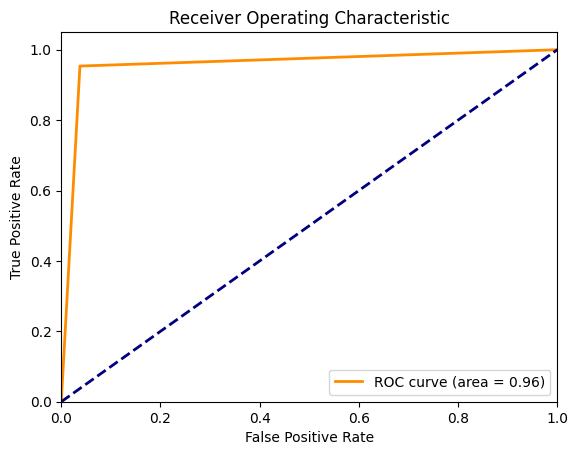

In [ ]:
import ydf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


ds = pd.read_csv("output_left_singlelabel_add_del_NST.csv")
print("total dataframe :",ds.shape)
#X=ds['sAddress','rAddress']
#y= ds['IT_B_Label']

#X_train, X_test, y_train,  y_test = train_test_split(X,y ,
                          #random_state=104,
                          #train_size=0.8, shuffle=True)

mask = np.random.rand(len(ds)) < 0.8
train_ds = ds[mask]
test_ds = ds[~mask]

#test_ds = ds.tf.take(1000)
#train_ds = ds.tf.skip(1000)
print("train_ds count :" ,len(train_ds))
#test_ds = pd.read_csv("ML Test/output_left.csv")
print("test_ds count :" , len(test_ds))
#train_ds = pd.read_csv("ML Test/output_left_23.csv")
print("train_ds :" ,train_ds.head(5))
#test_ds = pd.read_csv("ML Test/output_left.csv")
print("test_ds :" ,test_ds.head(5))
model = ydf.GradientBoostedTreesLearner(label="NST_B_Label").train(train_ds)
model.describe()
print(model.evaluate(test_ds))

# Get model predictions for the test set
pred = model.predict(test_ds) # This line is crucial


test_labels = pd.to_numeric(test_ds['NST_B_Label'], errors='coerce') # Convert to numeric, handle errors
pred_labels = pd.to_numeric(pred, errors='coerce')                 # Convert to numeric, handle errors

pred_labels = (pred >= 0.5).astype(int) # Apply threshold and convert to integers

# Now use the converted labels for accuracy calculation
accuracy = accuracy_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, pred_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Analyse a model (e.g. partial dependence plot, variable importance)
model.analyze(test_ds)

# Benchmark the inference speed of a model
model.benchmark(test_ds)
#print(model.benchmark(test_ds))
#model.analyze(test_ds, sampling=0.1)
model.save("my_model")

loaded_model = ydf.load_model("my_model")